<a href="https://colab.research.google.com/github/juancuevas-ops/inteligencia-artificial/blob/main/lightgbm_classifier_in_python_Ale_Cuevas_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **LightGBM Classifier en Lenguaje Python**


Hola amigos,


En este núcleo, analizaré uno de los clasificadores LightGBM de algoritmos de aprendizaje automático más exitosos. LightGBM es un marco de refuerzo de gradiente rápido, distribuido y de alto rendimiento basado en algoritmos de árboles de decisión, que se utiliza para clasificar, clasificar y muchas otras tareas de aprendizaje automático. Ha ayudado a Kagglers a ganar concursos de ciencia de datos.

# **1. Introduction to LightGBM** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)


- [LightGBM](https://github.com/juancuevas-ops/inteligencia-artificial) *. 

es un marco de refuerzo de gradiente que utiliza algoritmos de aprendizaje basados ​​en árboles. Está diseñado para ser distribuido y eficiente con las siguientes ventajas:

  - Mayor velocidad de entrenamiento y mayor eficiencia.
  - Menor uso de memoria.
  - Mejor precisión.
  - Soporte de aprendizaje paralelo y GPU.
  - Capaz de manejar datos a gran escala.
  
  
- En la actualidad, los algoritmos de aprendizaje automático basados ​​en árboles de decisión dominan las competiciones de Kaggle. Las soluciones ganadoras de estos concursos han adoptado un algoritmo denominado **XGBoost**.

- Hace un par de años, Microsoft anunció LightGBM, su plataforma de potenciación de gradientes. Hoy en día, roba el centro de atención en las máquinas de aumento de gradiente. Los Kagglers comienzan a usar LightGBM más que XGBoost. LightGBM es 6 veces más rápido que XGBoost.

- Light GBM es un algoritmo relativamente nuevo y tiene una larga lista de parámetros en la [documentación de LightGBM] (https://github.com/microsoft/LightGBM),

- El tamaño del conjunto de datos está aumentando rápidamente. Se ha vuelto muy difícil para los algoritmos tradicionales de ciencia de datos dar resultados precisos. Light GBM tiene el prefijo **Light** debido a su alta velocidad. **Light GBM puede manejar un gran tamaño de datos y requiere menos memoria para ejecutarse*

# **2. LightGBM intuition** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)


- LightGBM es un marco de refuerzo de gradiente que utiliza un algoritmo de aprendizaje basado en árboles.


- La documentación de LightGBM establece que -

 `LightGBM hace crecer el árbol verticalmente, mientras que otros algoritmos de aprendizaje basados ​​en árboles hacen crecer los árboles horizontalmente.
 Significa que LightGBM crece en forma de hoja de árbol mientras que otros algoritmos crecen en nivel. elegirá
 la hoja con máxima pérdida delta para crecer. Al cultivar la misma hoja, el algoritmo de hoja inteligente puede reducir más
 pérdida que un algoritmo nivelado.
 
 
 - Por lo tanto, debemos comprender la distinción entre el crecimiento de los árboles por hojas y el crecimiento de los árboles por niveles.

## **2.1 Árbol de hoja sabia** <a class="anchor" id="2.1"></a>





-El crecimiento de los árboles en forma de hojas se puede explicar mejor con la siguiente imagen:

![Leaf-wise tree growth](https://i.stack.imgur.com/YOE9y.png)

## **2.2 Level-wise tree growth** <a class="anchor" id="2.2"></a>





- La mayoría de los algoritmos de aprendizaje de árboles de decisión hacen crecer el árbol por nivel (profundidad).

- El crecimiento del árbol por niveles se puede explicar mejor con la siguiente imagen:

![Level-wise tree growth](https://i.stack.imgur.com/e1FWe.png)

## **Important points about tree-growth**


- Si cultivamos el árbol completo, **lo mejor primero (por hoja)** y **profundidad primero (por nivel)** darán como resultado el mismo árbol. La diferencia está en el orden en que se expande el árbol. Dado que normalmente no cultivamos árboles en toda su profundidad, el orden es importante.

- La aplicación de criterios de parada temprana y métodos de poda puede dar como resultado árboles muy diferentes. Debido a que leaf-wise elige divisiones en función de su contribución a la pérdida global y no solo la pérdida a lo largo de una rama en particular, a menudo (no siempre) aprenderá árboles de menor error "más rápido" que en nivel.

- Para una pequeña cantidad de nodos, el nivel de hoja probablemente supere el nivel. A medida que agreguemos más nodos, sin detenerlos ni podarlos, convergerán al mismo rendimiento porque eventualmente construirán literalmente el mismo árbol.

# **3. XGBoost Vs LightGBM** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)



- [XGBoost](https://github.com/dmlc/xgboost) es un algoritmo ML muy rápido y preciso. Pero ahora ha sido desafiado por [LightGBM](https://github.com/microsoft/LightGBM), que se ejecuta incluso más rápido con una precisión de modelo comparable y más hiperparámetros para que los usuarios ajusten.

- La diferencia clave en la velocidad es que **XGBoost divide los nodos del árbol un nivel a la vez** y **LightGBM hace ese nodo a la vez**.

- Entonces, los desarrolladores de XGBoost mejoraron más tarde sus algoritmos para ponerse al día con LightGBM, lo que ayudó a los usuarios a ejecutar XGBoost en modo dividido por hoja `(grow_policy = 'lossguide')`. Ahora, XGBoost es mucho más rápido con esta mejora, pero LightGBM sigue siendo aproximadamente 1,3X — 1,5X la velocidad de XGB.

- Otra diferencia entre XGBoost y LightGBM es que XGBoost tiene una función de la que carece de LightGBM: **restricción monotónica**. Sacrificará parte de la precisión del modelo y eliminará el tiempo de entrenamiento, pero puede mejorar la interpretación del modelo.

# **4. LightGBM Parameters** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


- [LightGBM](https://github.com/microsoft/LightGBM) provides more than 100 [LightGBM parameters](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst).

- It is very important to know some basic parameters of LightGBM. 

- So, in this section, I will discuss some basic parameters of LightGBM.


## **4.1 Control Parameters** <a class="anchor" id="4.1"></a>




- **max_ depth** : Describe la profundidad máxima del árbol. Este parámetro se usa para manejar el sobreajuste del modelo. Si cree que su modelo está sobreajustado, debe reducir la profundidad máxima.

- **min_data_in_leaf** : Es el número mínimo de registros que puede tener una hoja. El valor por defecto es 20, valor óptimo. También se utiliza para tratar el sobreajuste.

- **feature_fraction**: se usa cuando tu impulso es un bosque aleatorio. La fracción de características de 0.8 significa que LightGBM seleccionará el 80% de los parámetros aleatoriamente en cada iteración para construir árboles.

- **bagging_fraction**: especifica la fracción de datos que se usará para cada iteración y generalmente se usa para acelerar el entrenamiento y evitar el sobreajuste.

- **early_stopping_round** : este parámetro puede ayudarlo a acelerar su análisis. El modelo dejará de entrenarse si una métrica de un dato de validación no mejora en las últimas rondas de Early_Stopping_Round. Esto reducirá las iteraciones excesivas.

- **lambda** : lambda especifica la regularización. El valor típico varía de 0 a 1.

- **min_gain_to_split** : Este parámetro describirá la ganancia mínima para realizar un split. Se puede utilizar para controlar el número de divisiones útiles en el árbol.

- **max_cat_group** : cuando el número de categorías es grande, es fácil encontrar el punto de división en un ajuste excesivo. Entonces LightGBM los fusiona en grupos 'max_cat_group' y encuentra los puntos de división en los límites del grupo, por defecto: 64.

## **4.2 Core Parameters** <a class="anchor" id="4.2"></a>




-*Tarea**: especifica la tarea que desea realizar en los datos. Puede ser entrenado o predecir.

- **aplicación**: este es el parámetro más importante y especifica la aplicación de su modelo, ya sea un problema de regresión o un problema de clasificación. LightGBM considerará por defecto el modelo como un modelo de regresión.

  - **regresión** : para regresión
  - **binary** : para clasificación binaria
  - **multiclase** : para problemas de clasificación multiclase
  
  
- **boosting** : define el tipo de algoritmo que desea ejecutar, por defecto=gdbt.

  - **gbdt** : árbol de decisión de aumento de gradiente tradicional
  - **rf**: bosque aleatorio
  - **dardo**: los abandonos se encuentran con árboles de regresión aditivos múltiples
  - **goss**: Muestreo de un lado basado en degradado
  
  
- **num_boost_round**: número de iteraciones de impulso, normalmente más de 100

- **learning_rate**: Esto determina el impacto de cada árbol en el resultado final. GBM funciona comenzando con una estimación inicial que se actualiza utilizando la salida de cada árbol. El parámetro de aprendizaje controla la magnitud de este cambio en las estimaciones. Valores típicos: 0.1, 0.001, 0.003…

- **num_hojas**: número de hojas en el árbol completo, por defecto: 31

- **dispositivo**: predeterminado: cpu, también puede pasar gpu

## **4.3 Metric Parameter** <a class="anchor" id="4.3"></a>


[Table of Contents](#0.1)


- metric: again one of the important parameter as it specifies loss for model building. Below are few general losses for regression and classification.

  - **mae** : mean absolute error
  - **mse** : mean squared error
  - **binary_logloss** : loss for binary classification
  - **multi_logloss** : loss for multi classification

## **4.4 IO Parameter** <a class="anchor" id="4.4"></a>




- **max_bin**: indica el número máximo de contenedores en los que se acumulará el valor de la característica.

- **categorical_feature** : Denota el índice de características categóricas. Si categorical_features=0,1,2 entonces la columna 0, la columna 1 y la columna 2 son variables categóricas.

- **ignore_column**: igual que categorical_features solo que en lugar de considerar columnas específicas como categóricas, las ignorará por completo.

- **save_binary**: si realmente está tratando con el tamaño de la memoria de su archivo de datos, especifique este parámetro como 'Verdadero'. Especificar el parámetro verdadero guardará el conjunto de datos en un archivo binario, este archivo binario acelerará el tiempo de lectura de datos para la próxima vez.


Now, we move on to the LightGBM implementation.

# **5. LightGBM implementacion in Python** <a class="anchor" id="5"></a>


[

## **Configuración inicial**

In [27]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

## **Lectura del dataset**

In [29]:
import pandas as pd

# tenemos una vista previa de carga de de los datos obteniendo las primera 5 filas del dataset
df = pd.read_csv('/content/Breast_cancer_data_1.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## **View summary of dataset**
## ## **Ver resumen del conjunto de datos**

In [25]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


- We can see that there are 6 columns in the dataset and there are no missing values.

## **Comprobar la distribución de la variable objetivo**

- la variable objetivo es `diagnóstico`
- comprobar la distribución de la variable objetivo.

In [26]:
# # comprobar la distribución de la variable objetivo en este caso es diagnosis o diagnostico del cancer
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64



La variable objetivo es el diagnóstico. Contiene 2 valores - 0 y 1.

0 es para predicción negativa y 1 para predicción positiva.

Podemos ver que el problema es una tarea de clasificación binaria.

## **Declare feature vector and target variable**

## **Declarar vector de características y variable de destino
 en este caso las variables que insiden en que un diagnostico del cancer sea preciso son las siguentes variable:'radio_medio','textura_media','perímetro_medio','área_media','suavidad_media

In [8]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

## **Split dataset into training and test set**
## **Dividir conjunto de datos en conjunto de entrenamiento y prueba**

In [30]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## **Desarrollo y entrenamiento del modelo LightGBM**


- Necesitamos convertir nuestros datos de entrenamiento al formato de conjunto de datos de LightGBM (esto es obligatorio para el entrenamiento de LightGBM).

- Después de crear el conjunto de datos necesario, creamos un diccionario de Python con parámetros y sus valores.

- La precisión del modelo depende de los valores que proporcionemos a los parámetros.

In [31]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

## **## **Predicción del modelo****

In [32]:
# predict the results
y_pred=clf.predict(X_test)


## **View Accuracy**
## **Ver Precisión**

In [33]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9240



- Aquí, `y_test` son las etiquetas de clase verdaderas e `y_pred` son las etiquetas de clase predichas en el conjunto de prueba.

## **Compare train and test set accuracy**


Compare la precisión del tren y del conjunto de pruebas
Ahora, compararé la precisión del conjunto de trenes y del conjunto de prueba para comprobar si hay sobreajuste.

In [34]:
y_pred_train = clf.predict(X_train)

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


## **Check for Overfitting**
## **Comprobar sobreajuste**

In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9240



- La precisión del conjunto de entrenamiento y prueba es bastante comparable. Por lo tanto, no podemos decir que haya sobreajuste.
- La precisión del conjunto de entrenamiento y prueba es bastante comparable. Por lo tanto, no podemos decir que haya sobreajuste.

## **Confusion-matrix**
##Matriz de confusión

In [38]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  5 103]]

True Positives(TP) =  55

True Negatives(TN) =  103

False Positives(FP) =  8

False Negatives(FN) =  5


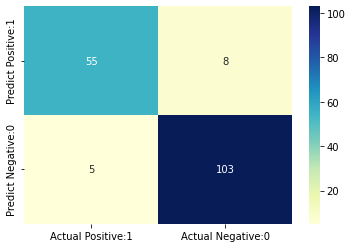

In [39]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns # viualizacion estatica de datos


cm_matrix_chile = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_chile, annot=True, fmt='d', cmap='YlGnBu')

## **Métricas de clasificación**


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        63
           1       0.93      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



# **6. Ajuste de parámetros de LightGBM**  <a class="anchor" id="6"></a>





- En esta sección, discutiré algunos consejos para mejorar la eficiencia del modelo LightGBM.

- El siguiente conjunto de prácticas se puede utilizar para mejorar la eficiencia de su modelo.

  - 1 **num_hojas** : Este es el parámetro principal para controlar la complejidad del modelo de árbol. Idealmente, el valor de num_hojas debería ser menor o igual a 2^(max_ depth). Valor más que esto resultará en sobreajuste.

  - 2 **min_data_in_leaf**: configurarlo en un valor grande puede evitar que el árbol crezca demasiado, pero puede provocar un ajuste insuficiente. En la práctica, configurarlo en cientos o miles es suficiente para un gran conjunto de datos.

  - 3 **max_ depth**: También podemos usar max_ depth para limitar la profundidad del árbol explícitamente.

## **Para mayor velocidad**

- Use embolsado configurando `bagging_fraction` y `bagging_freq`.
- Use el submuestreo de características configurando `feature_fraction`.
- Usa `max_bin` pequeño.
- Use `save_binary` para acelerar la carga de datos en futuros aprendizajes.

## **Para mayor precisión**

- Use `max_bin` grande (puede ser más lento).
- Use una pequeña `tasa de aprendizaje` con `gran número de iteraciones`
- Use `num_leaves` grandes (puede causar un ajuste excesivo)
- Usa datos de entrenamiento más grandes
- Prueba `dardo`
- Intente usar la función categórica directamente.

## **Para lidiar con el ajuste excesivo**

- Usa `max_bin` pequeño
- Usa `num_hojas` pequeñas
- Usa `min_data_in_leaf` y `min_sum_hessian_in_leaf`
- Use embolsado por conjunto `bagging_fraction` y `bagging_freq`
- Utilice el submuestreo de características mediante el conjunto `feature_fraction`
- Usa datos de entrenamiento más grandes
- Pruebe `lambda_l1`, `lambda_l2` y `min_gain_to_split` para la regularización
- Pruebe `max_ depth` para evitar que crezca un árbol profundo

# **7. References**  <a class="anchor" id="7"></a>


##https://github.com/juancuevas-ops/inteligencia-artificial

Ese es el final de este núcleo.

Espero que encuentre este núcleo útil y agradable.

Sus comentarios y opiniones son bienvenidos.

Gracias

Actualizado y Ejecutado por Juan Alejandro Cuevas.
